# Análisis de Ventas - Histogramas

Análisis visual de los datos de ventas mediante histogramas.


## Importación de librerías y carga de datos


In [12]:
import os
print(os.getcwd())
print(os.listdir("../data"))

/Users/elianah/code/CEIA/CEIA-probabilidad_y_estadistica/trabajo1/code
['Datos_primer_TP_22Co2024_a2217.xlsx']


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuración de gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

ARCHIVO_DATOS = "../data/Datos_primer_TP_22Co2024_a2217.xlsx"

print(f"Cargando archivo: {ARCHIVO_DATOS}")
df = pd.read_excel(ARCHIVO_DATOS)
print(f"✅ Datos cargados exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas")


Cargando archivo: ../data/Datos_primer_TP_22Co2024_a2217.xlsx
✅ Datos cargados exitosamente: 1095 filas, 2 columnas


## Histograma 1: Distribución de Ventas


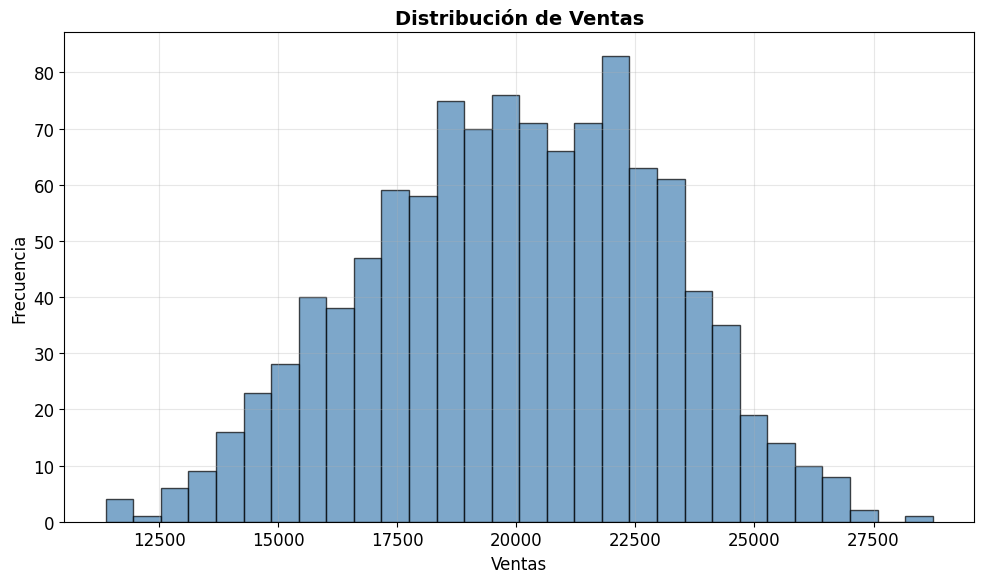

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ventas'], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribución de Ventas', fontsize=14, fontweight='bold')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Histograma 2: Ventas por Mes


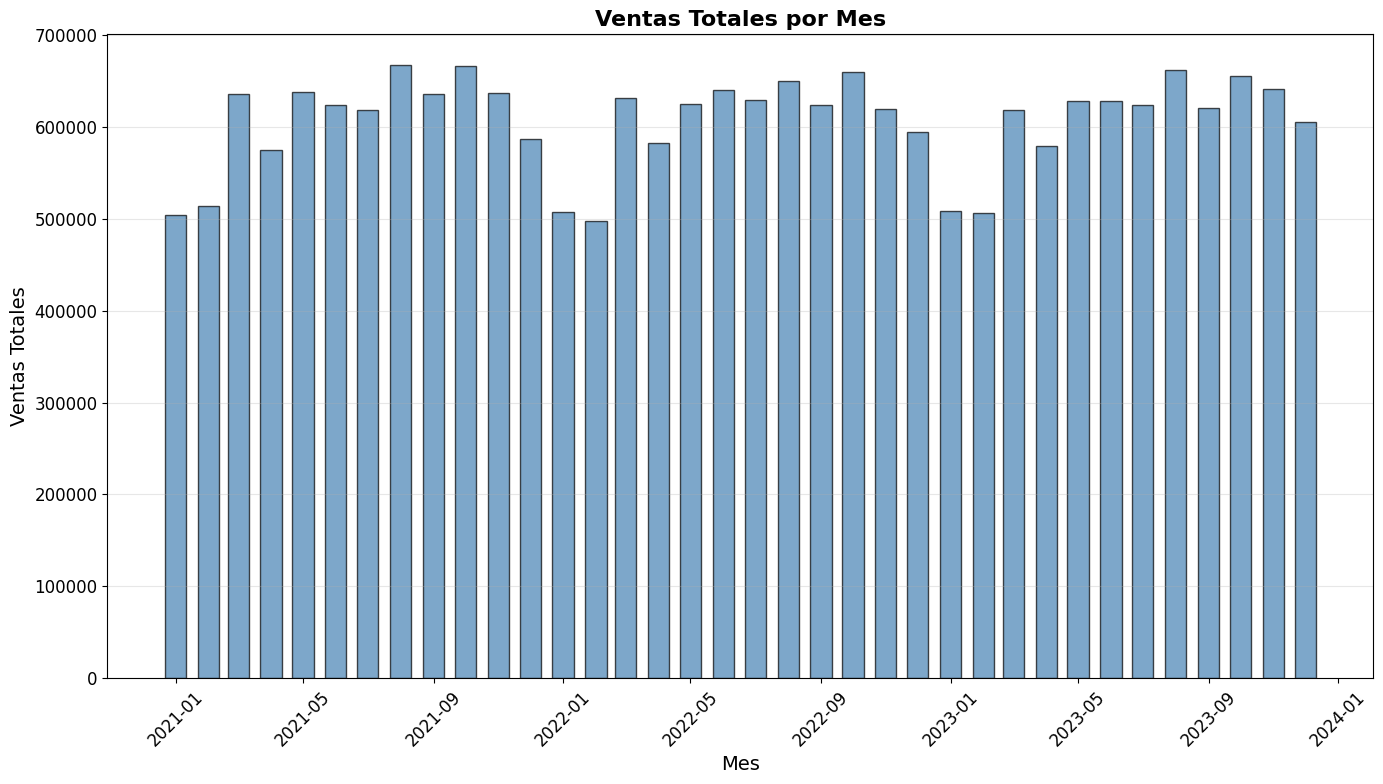

In [15]:
# Preparar datos mensuales
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año_Mes'] = df['Fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('Año_Mes')['Ventas'].sum().reset_index()
ventas_mensuales['Fecha_Mes'] = ventas_mensuales['Año_Mes'].dt.start_time

# Crear histograma temporal
plt.figure(figsize=(14, 8))
plt.bar(ventas_mensuales['Fecha_Mes'], ventas_mensuales['Ventas'], 
        width=20, alpha=0.7, edgecolor='black', color='steelblue')

plt.title('Ventas Totales por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


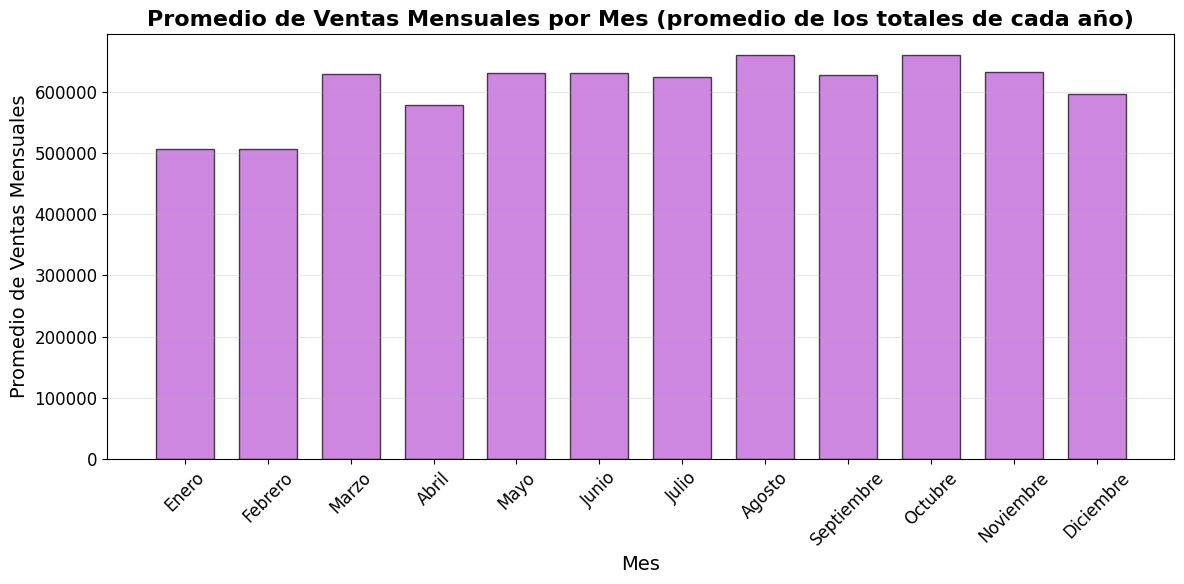

In [16]:
df['Año'] = df['Fecha'].dt.year
df['NumeroMes'] = df['Fecha'].dt.month
df['NombreMes'] = df['Fecha'].dt.month_name(locale='es_ES')  # O sin locale si no soporta español

# Suma total de ventas por mes y año
ventas_mensuales = df.groupby(['Año', 'NumeroMes'])['Ventas'].sum().reset_index()

# Promedio de los totales mensuales para cada mes
promedio_ventas_mes = ventas_mensuales.groupby('NumeroMes')['Ventas'].mean().reindex(range(1, 13), fill_value=0)
nombres_meses = df.groupby('NumeroMes')['NombreMes'].first().reindex(range(1, 13))

plt.figure(figsize=(12, 6))
plt.bar(nombres_meses, promedio_ventas_mes.values,
        width=0.7, alpha=0.7, edgecolor='black', color='mediumorchid')

plt.title('Promedio de Ventas Mensuales por Mes (promedio de los totales de cada año)', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Promedio de Ventas Mensuales', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma 3: Ventas por semana

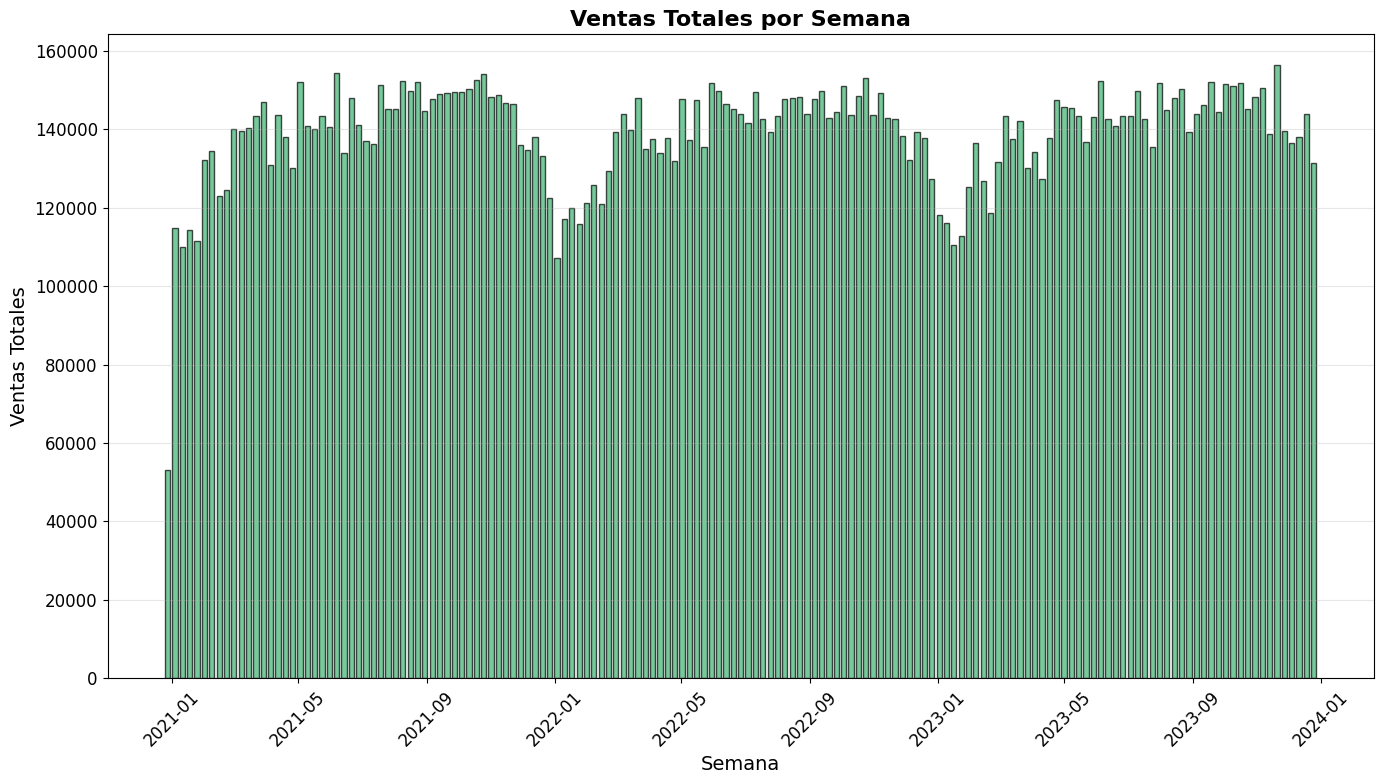

In [17]:
# Histograma de Ventas por Semana

# Crear columna de semana (inicio de cada semana)
df['Semana'] = df['Fecha'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar ventas por semana
ventas_semanales = df.groupby('Semana')['Ventas'].sum().reset_index()

# Graficar histograma semanal
plt.figure(figsize=(14, 8))
plt.bar(ventas_semanales['Semana'], ventas_semanales['Ventas'],
        width=5, alpha=0.7, edgecolor='black', color='mediumseagreen')

plt.title('Ventas Totales por Semana', fontsize=16, fontweight='bold')
plt.xlabel('Semana', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

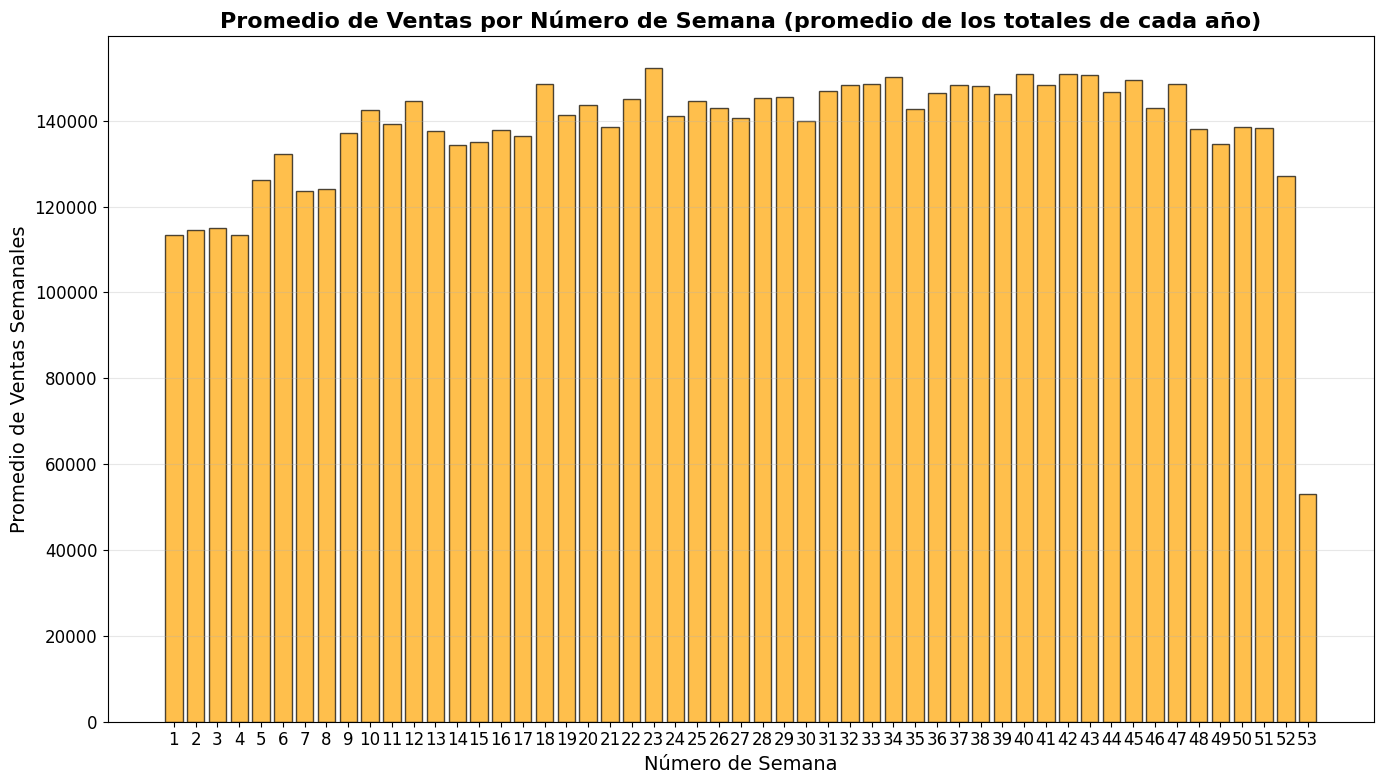

In [18]:
# Histograma 3.5: Promedio de ventas por número de semana (promedio de los totales de cada semana en cada año)

# Crear columnas de año y número de semana
df['Año'] = df['Fecha'].dt.isocalendar().year
df['NumeroSemana'] = df['Fecha'].dt.isocalendar().week

# Sumar ventas por año y número de semana
ventas_semanales = df.groupby(['Año', 'NumeroSemana'])['Ventas'].sum().reset_index()

# Calcular el promedio de ventas por número de semana (promedio de los totales semanales de cada año)
promedio_ventas_semana = ventas_semanales.groupby('NumeroSemana')['Ventas'].mean().reindex(range(1, 54), fill_value=0)

# Graficar
plt.figure(figsize=(14, 8))
plt.bar(promedio_ventas_semana.index, promedio_ventas_semana.values,
        width=0.8, alpha=0.7, edgecolor='black', color='orange')

plt.title('Promedio de Ventas por Número de Semana (promedio de los totales de cada año)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Semana', fontsize=14)
plt.ylabel('Promedio de Ventas Semanales', fontsize=14)
plt.xticks(range(1, 54))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Histograma 4: Ventas por día de la semana

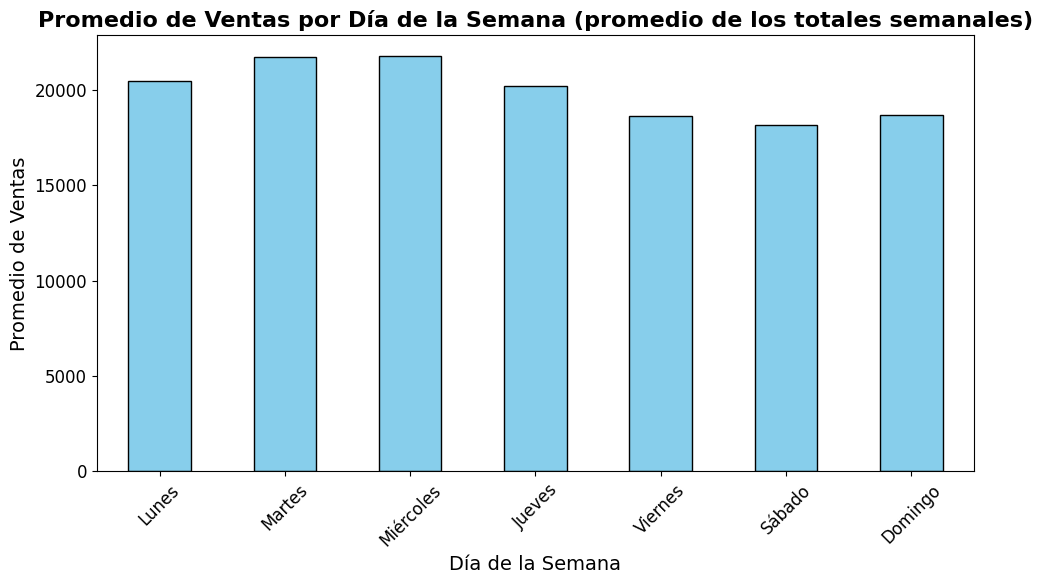

In [19]:
# Crear columnas de año, semana y día de la semana
df['Año'] = df['Fecha'].dt.isocalendar().year
df['NumeroSemana'] = df['Fecha'].dt.isocalendar().week
df['DiaSemana'] = df['Fecha'].dt.day_name(locale='es_ES')

# Sumar ventas por año, semana y día de la semana
ventas_diarias = df.groupby(['Año', 'NumeroSemana', 'DiaSemana'])['Ventas'].sum().reset_index()

# Calcular el promedio de ventas por día de la semana (promedio de los totales de cada día en cada semana)
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
promedio_ventas_dia = ventas_diarias.groupby('DiaSemana')['Ventas'].mean().reindex(dias_orden)

# Graficar
plt.figure(figsize=(10, 6))
promedio_ventas_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Promedio de Ventas por Día de la Semana (promedio de los totales semanales)', fontsize=16, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Promedio de Ventas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis: distribución de ventas para un año en particular

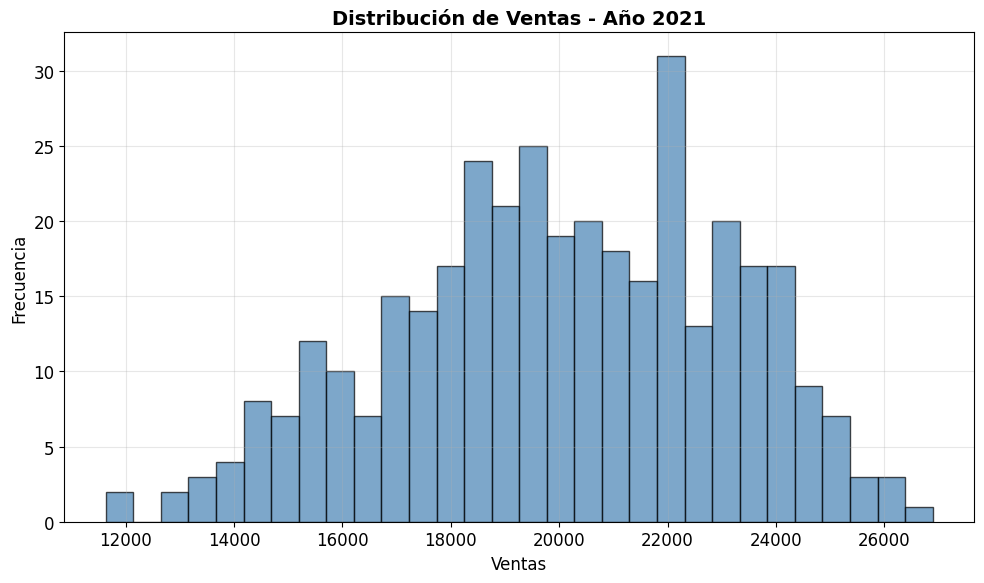

Datos de 2021: 365 días
Ventas promedio 2021: $20017.33
Ventas mínimas 2021: $11631.04
Ventas máximas 2021: $26893.03


In [20]:
# Filtrar datos solo para el año 2021
df_2021 = df[df['Fecha'].dt.year == 2021]

# Crear histograma solo para 2021
plt.figure(figsize=(10, 6))
plt.hist(df_2021['Ventas'], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribución de Ventas - Año 2021', fontsize=14, fontweight='bold')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Opcional: mostrar estadísticas básicas para 2021
print(f"Datos de 2021: {len(df_2021)} días")
print(f"Ventas promedio 2021: ${df_2021['Ventas'].mean():.2f}")
print(f"Ventas mínimas 2021: ${df_2021['Ventas'].min():.2f}")
print(f"Ventas máximas 2021: ${df_2021['Ventas'].max():.2f}")

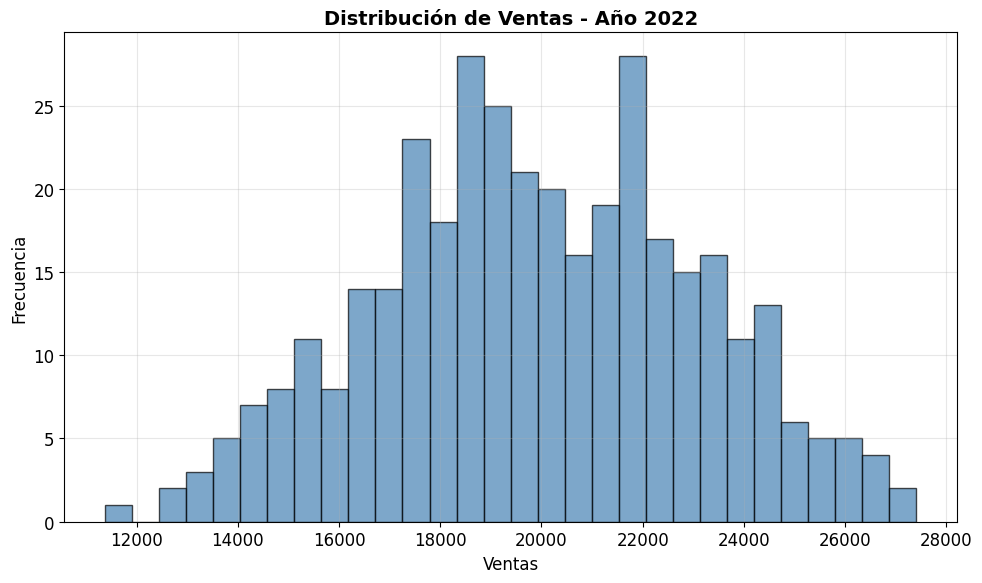

Datos de 2022: 365 días
Ventas promedio 2022: $19903.52
Ventas mínimas 2022: $11373.59
Ventas máximas 2022: $27408.64


In [21]:
# Filtrar datos solo para el año 2022
df_2022 = df[df['Fecha'].dt.year == 2022]

# Crear histograma solo para 2022
plt.figure(figsize=(10, 6))
plt.hist(df_2022['Ventas'], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribución de Ventas - Año 2022', fontsize=14, fontweight='bold')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Opcional: mostrar estadísticas básicas para 2022
print(f"Datos de 2022: {len(df_2022)} días")
print(f"Ventas promedio 2022: ${df_2022['Ventas'].mean():.2f}")
print(f"Ventas mínimas 2022: ${df_2022['Ventas'].min():.2f}")
print(f"Ventas máximas 2022: ${df_2022['Ventas'].max():.2f}")

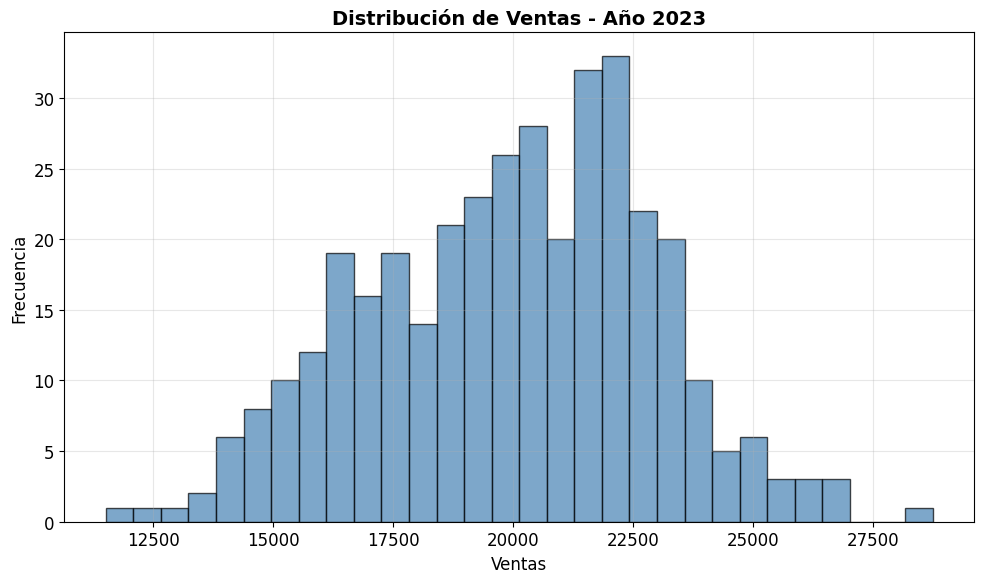

Datos de 2023: 365 días
Ventas promedio 2023: $19955.87
Ventas mínimas 2023: $11512.59
Ventas máximas 2023: $28742.42


In [22]:
# Filtrar datos solo para el año 2023
df_2023 = df[df['Fecha'].dt.year == 2023]

# Crear histograma solo para 2023
plt.figure(figsize=(10, 6))
plt.hist(df_2023['Ventas'], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribución de Ventas - Año 2023', fontsize=14, fontweight='bold')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Opcional: mostrar estadísticas básicas para 2023
print(f"Datos de 2023: {len(df_2023)} días")
print(f"Ventas promedio 2023: ${df_2023['Ventas'].mean():.2f}")
print(f"Ventas mínimas 2023: ${df_2023['Ventas'].min():.2f}")
print(f"Ventas máximas 2023: ${df_2023['Ventas'].max():.2f}")

## Cálculo de la función empírica

F_x: [0.00273973 0.00547945 0.00821918 0.0109589  0.01369863 0.01643836
 0.01917808 0.02191781 0.02465753 0.02739726 0.03013699 0.03287671
 0.03561644 0.03835616 0.04109589 0.04383562 0.04657534 0.04931507
 0.05205479 0.05479452 0.05753425 0.06027397 0.0630137  0.06575342
 0.06849315 0.07123288 0.0739726  0.07671233 0.07945205 0.08219178
 0.08493151 0.08767123 0.09041096 0.09315068 0.09589041 0.09863014
 0.10136986 0.10410959 0.10684932 0.10958904 0.11232877 0.11506849
 0.11780822 0.12054795 0.12328767 0.1260274  0.12876712 0.13150685
 0.13424658 0.1369863  0.13972603 0.14246575 0.14520548 0.14794521
 0.15068493 0.15342466 0.15616438 0.15890411 0.16164384 0.16438356
 0.16712329 0.16986301 0.17260274 0.17534247 0.17808219 0.18082192
 0.18356164 0.18630137 0.1890411  0.19178082 0.19452055 0.19726027
 0.2        0.20273973 0.20547945 0.20821918 0.2109589  0.21369863
 0.21643836 0.21917808 0.22191781 0.22465753 0.22739726 0.23013699
 0.23287671 0.23561644 0.23835616 0.24109589 0.24383562 0

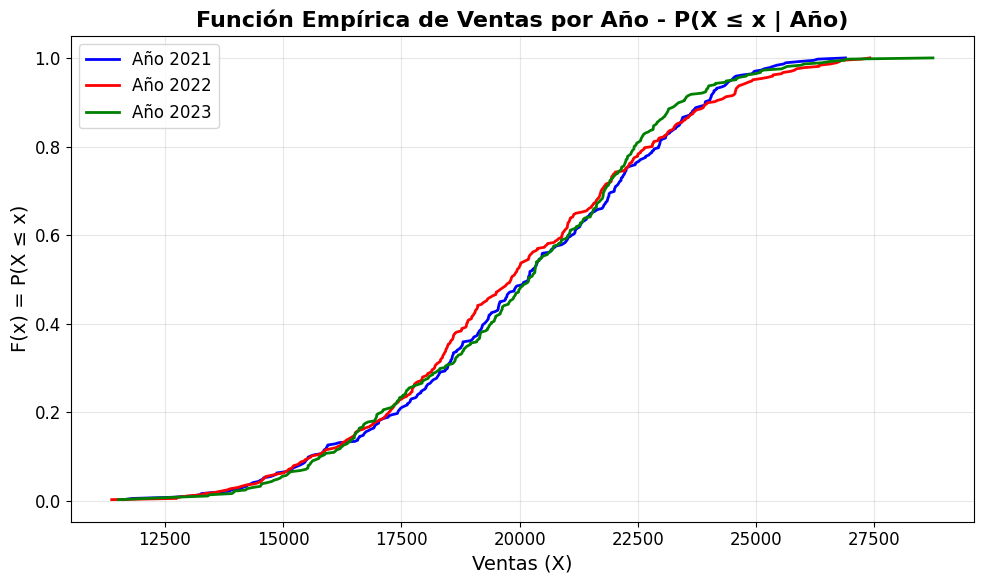

In [ ]:
import numpy as np
from scipy import stats

# Función para calcular la función empírica
def calcular_funcion_empirica(datos):
    """
    Calcula la función empírica (ECDF) de un conjunto de datos
    Retorna los valores ordenados y sus probabilidades acumuladas
    """
    datos_ordenados = np.sort(datos)
    n = len(datos)
    # F(x) = número de observaciones <= x / total de observaciones
    probabilidades = np.arange(1, n + 1) / n
    return datos_ordenados, probabilidades

# Separar datos por año
años = sorted(df['Fecha'].dt.year.unique())
colores = ['blue', 'red', 'green', 'orange', 'purple']

# Graficar función empírica para cada año
plt.figure(figsize=(10, 6))

for i, año in enumerate(años):
    df_año = df[df['Fecha'].dt.year == año]
    ventas_año = df_año['Ventas'].values
    
    # Calcular función empírica
    x_vals, F_x = calcular_funcion_empirica(ventas_año)
    
    # Graficar
    plt.plot(x_vals, F_x, label=f'Año {año}', 
             color=colores[i % len(colores)], linewidth=2)
    
    print(f"Año {año}: {len(ventas_año)} observaciones")

plt.title('Función Empírica de Ventas por Año - P(X ≤ x | Año)', fontsize=16, fontweight='bold')
plt.xlabel('Ventas (X)', fontsize=14)
plt.ylabel('F(x) = P(X ≤ x)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()